In [62]:
# from binary_to_csv import binary_to_csv
import struct, csv

def binary_to_csv(binary_file_location: str, csv_file_location: str) -> None:
    num_bytes = 32
    binary_bytes = None
    with open(binary_file_location, "rb") as data_file:
        binary_bytes = data_file.read()
    converted_bytes = [0] * round(len(binary_bytes) / num_bytes)
    for i in range(0, len(binary_bytes), num_bytes):
        converted_bytes[round(i / num_bytes)] = struct.unpack("<Lfffffff", binary_bytes[i: i + num_bytes])

    with open(csv_file_location, 'w', newline='') as write_file:
        csv_out = csv.writer(write_file)
        csv_out.writerow(["Time since launch (ms)", "X Acceleration (m/s)", "Y Acceleration (m/s)", "Z Acceleration (m/s)", "Altitude (m)", "Pressure (Pa)", "Temp (F)", "Filtered Altitude (m)"])
        for row in converted_bytes:
            csv_out.writerow(row)
binary_to_csv("FLIGHT1.TXT", "Flight_1.csv")

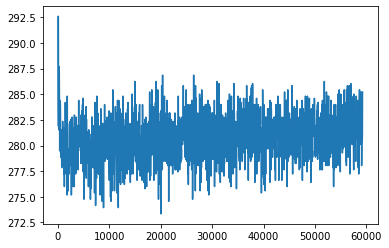

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Flight_1.csv")
data = data.drop(data.index[-1])
plt.plot(data["Time since launch (ms)"], data["Altitude (m)"])